In [1]:
import pandas as pd

diabetes_df = pd.read_csv("diabetes.csv")

In [2]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Logistic regression is a basic alogrithm in machine learning for binary classification tasks. 
#### It is used to predict outcomes that can have only two possible values, like yes or no.

#### It uses a special function called the logistic function, or sigmoid function, which converts any number into a value between 0 and 1, making it perfect for predicting probabilities.

#### In logistic regression, each input feature gets a weight that shows how important it is. During training, the model changes these weights to best fit the data.

#### To evaluate how well our logistic regression model works, we use metrics like accuracy, precision, recall, Confusion Matrix and the ROC score.

# 1. Recursive Feature Elimination (Iterative Feature Selection)

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = diabetes_df.drop(columns=["Outcome"])  # all features expect Outcome
y = diabetes_df["Outcome"] # only the Outcome Feature

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Scale the data using RobustScaler
# RobustScaler is used to handle outliers by scaling the features using statistics that are robust to outliers
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Recursive Feature Elimination (RFE) with logistic regression
# RFE is used to select the most important features by recursively fitting the model and removing the least important feature each time
logistic_regression = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logistic_regression, n_features_to_select=2) 
rfe.fit(X_train_scaled, y_train)

# Display the selected features
selected_features = rfe.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_features]
print("Selected Features:")
print(selected_feature_names)

Selected Features:
['Glucose', 'BMI']


#### In summary,with the Recursive Feature Elimination, we identified the two most important features in our dataset for predicting diabetes.

# 2. Visualization of the Logistic Regression

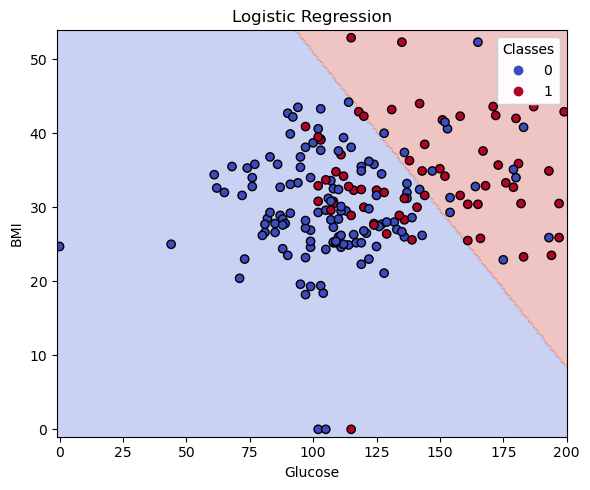

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features and target variable
X = diabetes_df[['Glucose', 'BMI']]
y = diabetes_df['Outcome']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model using the training data
model.fit(X_train, y_train)

# Plot decision boundaries using the test data
fig, ax = plt.subplots(figsize=(6, 5))

# Create a meshgrid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_test['Glucose'].min() - 1, X_test['Glucose'].max() + 1, 200),
                     np.linspace(X_test['BMI'].min() - 1, X_test['BMI'].max() + 1, 200))

# Combine the grid points into a dataframe
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_df = pd.DataFrame(grid_points, columns=['Glucose', 'BMI'])

# Make predictions for each point in the grid
Z = model.predict(grid_points_df)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
# Scatter plot of the test data points
scatter = ax.scatter(X_test['Glucose'], X_test['BMI'], c=y_test, edgecolor='k', cmap='coolwarm')
# Add legend to the plot
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
# Set plot title and labels
ax.set_title("Logistic Regression")
ax.set_xlabel("Glucose")
ax.set_ylabel("BMI")
# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

#### This plot shows the decision boundaries created by our logistic regression model using the ‘Glucose’ and ‘BMI’ features. 

#### The shaded areas show the predicted classes: blue for ‘no diabetes’ and red for ‘diabetes’. The scatter points are test data, colored by their true class. The model separates the classes, but some overlap indicates prediction challenges. 
#### This visualization helps to see the model’s performance.

# 3. Logistic Regression with 2 features (Glucose, BMI) with Standard C=1

#### So, now I want to apply logistic regression with 2 features using the standard C parameter of 1. Before we dive into the code, let’s briefly discuss the C parameter in logistic regression. 

#### The C parameter is known as the regularization parameter and it controls how much we avoid overfitting. A small C means we’re more strict, which helps prevent overfitting. 

#### A large C means we’re less strict, allowing the model to be more flexible.

Train Accurancy: 0.7569444444444444
Test Accurancy: 0.7760416666666666 

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       130
           1       0.70      0.53      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192

Example: Precision means that of all patients diagnosed as having diabetes by the model, 70% actually have diabetes
Example: Recall means that the model correctly identified 53% of all patients who actually have diabetes.



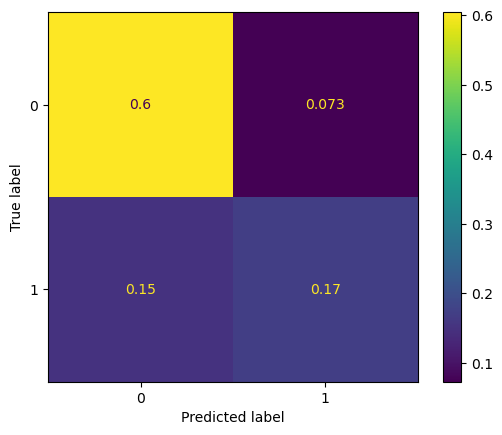

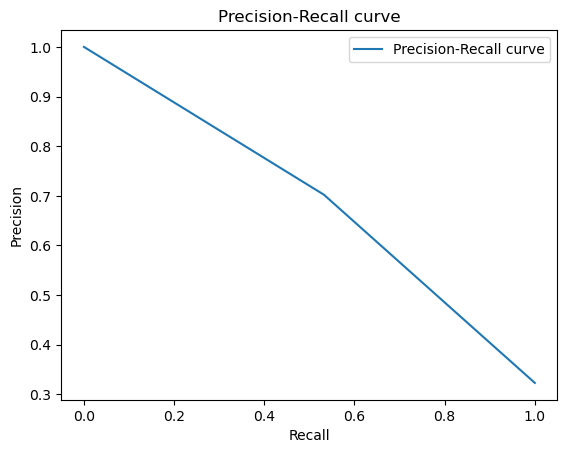

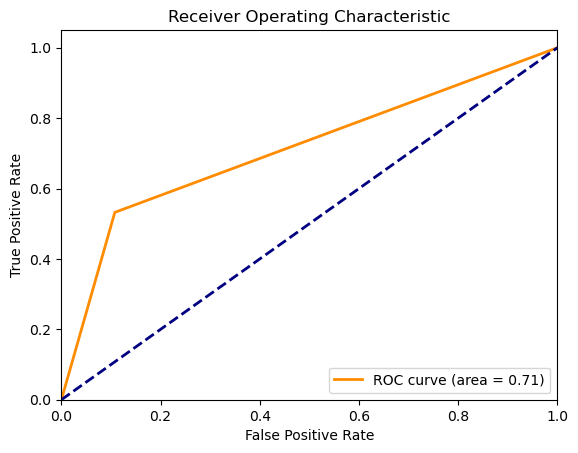

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score

# Define features and target variable
X = diabetes_df[["BMI", "Glucose"]]
y = diabetes_df["Outcome"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Define the logistic regression model
l_regression_2 = LogisticRegression(max_iter=1000)

# Fit the model using the training data
l_regression_2.fit(X_train, y_train)

# Make predictions on the test data
y_pred = l_regression_2.predict(X_test)

# Print the accuracy of the model
print("Train Accurancy: " + str(l_regression_2.score(X_train, y_train)))
print("Test Accurancy: " + str(l_regression_2.score(X_test, y_test)) + " \n")

# Evaluate the model using classification report
print(classification_report(y_test, y_pred))

print("Example: Precision means that of all patients diagnosed as having diabetes by the model, 70% actually have diabetes")
print("Example: Recall means that the model correctly identified 53% of all patients who actually have diabetes.\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 4. Logistic Regression with 3 features (Glucose, BMI, Age) with Standard C=1

#### Next, let’s see how the model performs with 3 features. Will we get better results?

Train Accuracy: 0.7673611111111112
Test Accuracy: 0.7760416666666666 

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.69      0.55      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



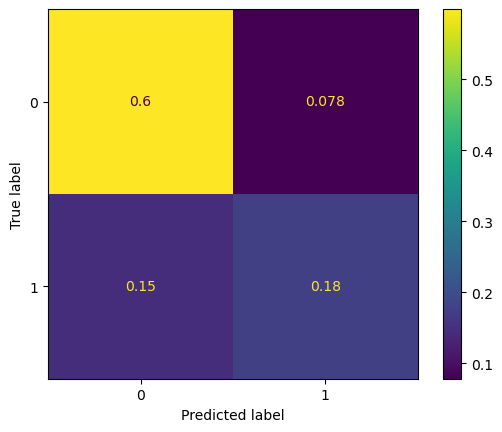

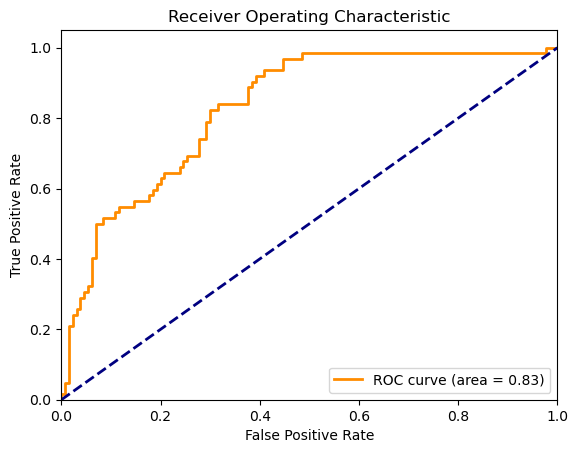

In [15]:
# Select features and target variable
X = diabetes_df[["BMI", "Glucose", "Age"]]
y = diabetes_df["Outcome"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Initialize and train the logistic regression model
l_regression_3 = LogisticRegression(max_iter=1000)
l_regression_3.fit(X_train, y_train)

# Make predictions on the test data
y_pred = l_regression_3.predict(X_test)

# Print the accuracy of the model
print("Train Accuracy: " + str(l_regression_3.score(X_train, y_train)))
print("Test Accuracy: " + str(l_regression_3.score(X_test, y_test)) + " \n")

# Evaluate the model using a classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, l_regression_3.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, l_regression_3.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### By comparing the two models, we observe that including Age as a feature does not significantly improve the model’s performance. 
#### Both models have a similar accuracy, precision and recall. However, the ROC score is noticeably better with three features (0.83) compared to two features (0.71).

# 5. Test with Scaler (GridSearchCV)

#### In this code, we aim to find the best preprocessing scaler and the optimal regularization parameter  C.

#### We will use a pipeline to streamline the process and GridSearchCV to test different combinations of scalers and  C  values.

Beste Parameter: {'logistic__C': 1, 'scaler': StandardScaler()}
Train Accuracy: 0.7673611111111112
Test Accuracy: 0.7760416666666666 

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.69      0.55      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



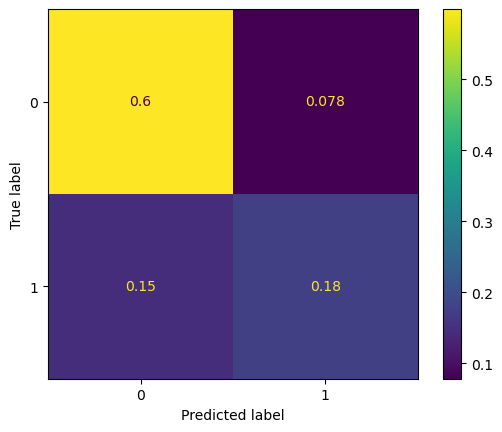

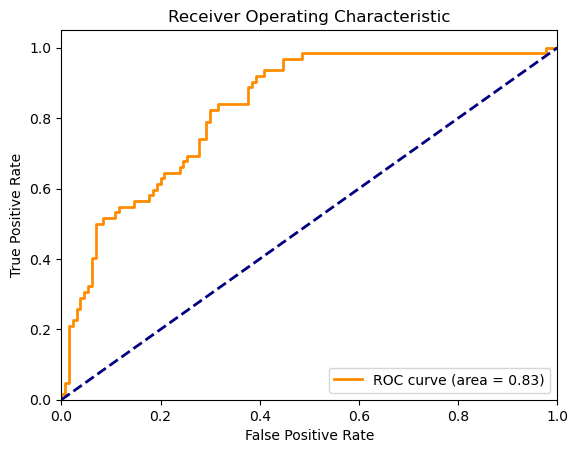

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline

# Select features and target variable
X = diabetes_df[["BMI", "Glucose", "Age"]]
y = diabetes_df["Outcome"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Define the scalers to be tested
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
scaler_names = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']

# Define the parameter grid for GridSearchCV
param_grid = {
    'scaler': scalers,
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create the pipeline with a placeholder scaler (to be replaced by GridSearchCV)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Placeholder, wird durch GridSearchCV ersetzt
    ('logistic', LogisticRegression(max_iter=1000,))
])

# Perform GridSearchCV to find the best scaler and parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and scaler found by GridSearchCV
print(f"Beste Parameter: {grid_search.best_params_}")

# Make predictions on the test set using the best model
best_scaler_model = grid_search.best_estimator_
y_pred = best_scaler_model.predict(X_test)

# Print the accuracy of the best model 
print("Train Accuracy: " + str(best_scaler_model.score(X_train, y_train)))
print("Test Accuracy: " + str(best_scaler_model.score(X_test, y_test)) + " \n")

# Evaluate the model using a classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# ROC curv
y_pred_prob = best_scaler_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### The results indicate that using different scalers, such as StandardScaler, MinMaxScaler, and RobustScaler, does not make any difference in the model’s performance. This suggests that the features (Glucose, BMI, Age) in this dataset are already on scales that are suitable for logistic regression, or that logistic regression is robust enough to perform well even with unscaled data in this case.

#### While scaling is usually recommended to prevent numerical problems and improve model performance, but it doesent always help.

# 

# 6. Balance between Diabetes and NoDiabtes

#### In this part of our analysis, we address the class imbalance in our dataset. Our goal is to build a logistic regression model to predict diabetes without being biased towards the majority class.

#### We use the class_weight='balanced' parameter in our logistic regression model.  
#### Balancing the classes can help improve the model’s accuracy and reliability, but it does not always guarantee better performance.

Train Accuracy: 0.7465277777777778
Test Accuracy: 0.734375

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       130
           1       0.58      0.63      0.60        62

    accuracy                           0.73       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.74      0.73      0.74       192



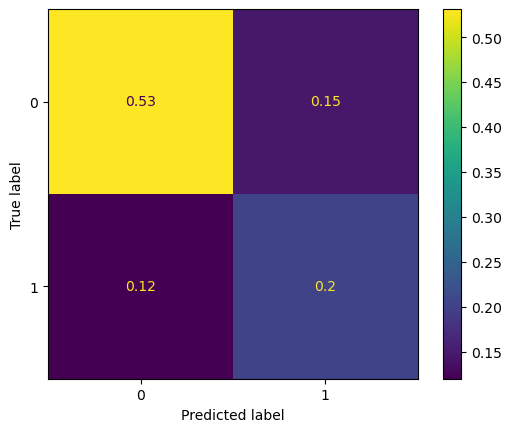

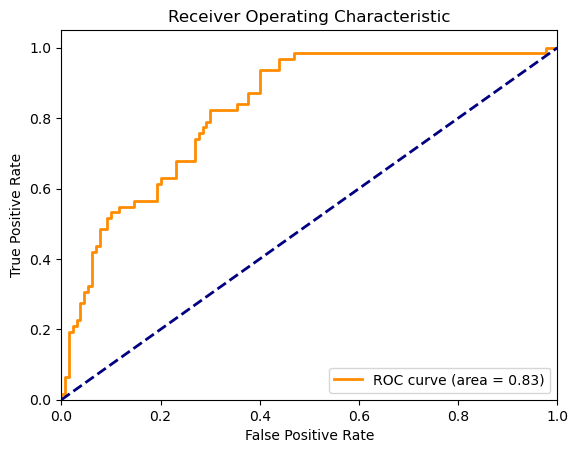

In [25]:
# Select features and target variable
X = diabetes_df[['Glucose', 'BMI', 'Age']]
y = diabetes_df['Outcome']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Standardize the data with the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a balanced logistic regression model
balance_model = LogisticRegression(class_weight='balanced', max_iter=1000)
balance_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = balance_model.predict(X_test_scaled)

# Print the accuracy of the model
print("Train Accuracy: " + str(balance_model.score(X_train_scaled, y_train)))
print("Test Accuracy: " + str(balance_model.score(X_test_scaled, y_test)) + "\n")

# Evaluate the model using a classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=balance_model.classes_)
disp.plot()
plt.show()

# ROC curve
y_pred_prob = balance_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### The results show that with the balanced model, precision and recall have slightly worsted, while the ROC AUC score remains the same.

# 7. Logistic Regression with GridSearchCV - Seach best C Value

#### Here, we used also 3 features as input. 
#### Logistic regression could accept all features and automatically assign weights to them. But, in our test, the automatic weighting did not produce good results, so we select the featues manual.

#### In this part, we use GridSearchCV to find the best C parameter for our logistic regression model.

Beste Parameter:  {'C': 0.1}
Train Accurancy: 0.77
Test Accurancy: 0.78
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.69      0.55      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192



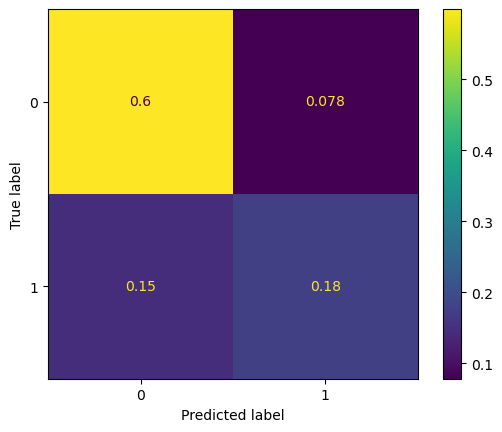

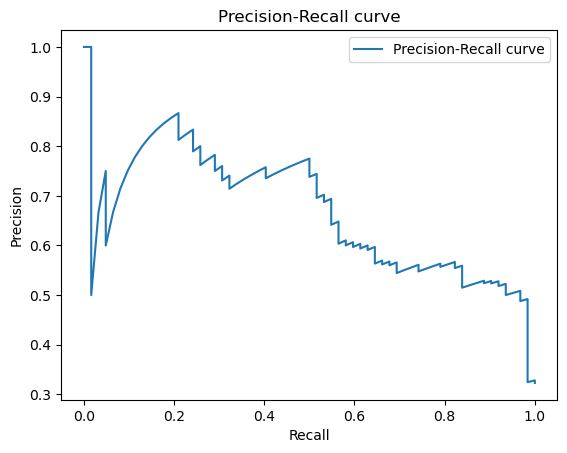

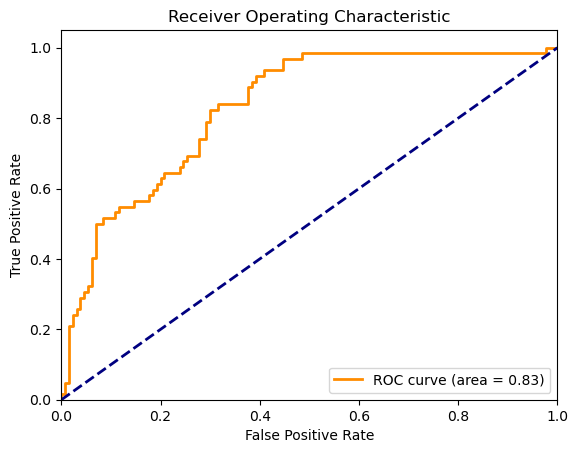

In [29]:
# Select features and target variable
X = diabetes_df[['Glucose', 'BMI', 'Age']]
y = diabetes_df['Outcome']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)


# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1.0, 10, 100]}

# Perform GridSearchCV with logistic regression
l_regression_grid_search= GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
l_regression_grid_search.fit(X_train, y_train)

# Print the best parameters and model accuracy
print("Beste Parameter: ", l_regression_grid_search.best_params_)
print("Train Accurancy: {:.2f}".format(l_regression_grid_search.score(X_train, y_train)))
print("Test Accurancy: {:.2f}".format(l_regression_grid_search.score(X_test, y_test)))

# Predictions on the test data
y_pred = l_regression_grid_search.predict(X_test)

# Evaluate the model using a classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Precision-Recall Curve
y_pred_prob = l_regression_grid_search.predict_proba(X_test)[:, 1]
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()

# ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### This approach allows us to identify the best logistic regression model for predicting diabetes in this dataset.

# 8. Adjusting the Treshold to 0,3

#### So now we aim to reduce the false negative rate of our logistic regression model because it is still too high. We will do this by adjusting the decision threshold from the default value of 0.5 to 0.3. This adjustment we made because we prefer to diagnose more patients with diabetes rather than missing out on who actually have it.

#### The decision threshold is the probability at which the model classifies a sample as positive or negative. By lowering the threshold to 0.3, the model will classify more samples as positive, helping to reduce the number of false negatives.

Classification Report with threshold 0.3:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       130
           1       0.56      0.73      0.63        62

    accuracy                           0.72       192
   macro avg       0.70      0.72      0.70       192
weighted avg       0.75      0.72      0.73       192



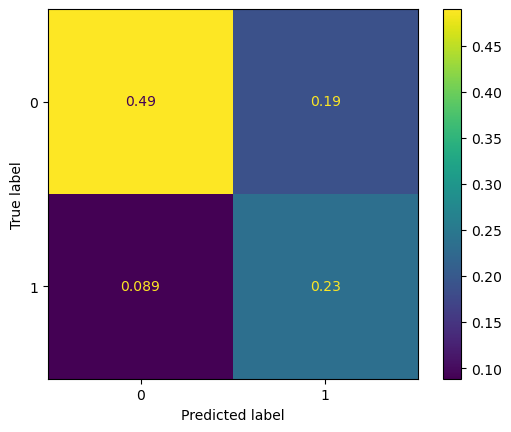

In [33]:
# Adjust the threshold to 0.3 to decrease false negatives
threshold = 0.3
y_pred_adj = (y_pred_prob >= threshold).astype(int)

# Evaluate the adjusted model using a classification report
print(f"Classification Report with threshold {threshold}:")
print(classification_report(y_test, y_pred_adj))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adj, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# 9. Predicting a New Sample with Logistic Regression

#### I’ll enter my numbers (BMI, Glucose, Age) into the model to see if it predicts diabetes.

In [36]:
# Function to predict a new sample
def predict_new_sample(sample):
    # Convert the sample list to a DataFrame with appropriate column names
    sample_df = pd.DataFrame([sample], columns=["Glucose", "BMI", "Age"])
    
    # Get the probability of each class for the sample
    prediction_proba = l_regression_grid_search.predict_proba(sample_df)
    
    # Adjust the threshold for prediction
    prediction = (prediction_proba[:, 1] >= 0.3).astype(int)
    
    # Return the prediction and the probabilities
    return prediction[0], prediction_proba[0]

# Input a new sample
# Example values for the new sample: Glucose, BMI, Age
new_sample = [90, 24, 23]

# Predict the new sample using the model with the adjusted threshold
prediction, prediction_proba = predict_new_sample(new_sample)

# Print the prediction result
print(f'Vorhersage: {"Diabetes" if prediction == 1 else "Kein Diabetes"}')
print(f'Probability of Diabetes: {prediction_proba[1] * 100:.2f}%')
print(f'Probability of No Diabetes: {prediction_proba[0] * 100:.2f}%')

Vorhersage: Kein Diabetes
Probability of Diabetes: 5.55%
Probability of No Diabetes: 94.45%


#### Displaying the output as percentages is useful because a simple yes or no answer can be too basic. Probabilities provide a clearer understanding of the model’s prediction, which is important for making well-informed decisions.